#PART-1 :
##Importing library and data and segregating int train test and sample

In [89]:
!ls .

sample_data  sample_submission.csv.zip	test.csv.zip  train.csv.zip


In [90]:
import os

In [91]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

In [92]:
!kaggle competitions download -c quora-insincere-questions-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [93]:
import pandas as pd

In [94]:
train_fname = '/content/train.csv.zip'
test_fname = '/content/test.csv.zip'
sample_fname = '/content/sample_submission.csv.zip'

In [95]:
raw_df = pd.read_csv(train_fname)

In [96]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


##qid is the question id and target is 0 for sincere questions and 1 for insincere

In [97]:
sincere_df = raw_df[raw_df.target == 0]

In [98]:
insincere_df = raw_df[raw_df.target == 1]

In [99]:
insincere_df

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1
...,...,...,...
1306093,fffeba722d9b371bd1b9,How is it to have intimate relation with your ...,1
1306094,fffee269360dd0d3947a,Why is it when singers have lyrics about voice...,1
1306099,ffff0e4ea1bb6e16feec,Do pakis smell of curry and shit?,1
1306103,ffff3f0a2449ffe4b9ff,Isn't Trump right after all? Why should the US...,1


In [100]:
raw_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93813
1,0.06187


<Axes: xlabel='target'>

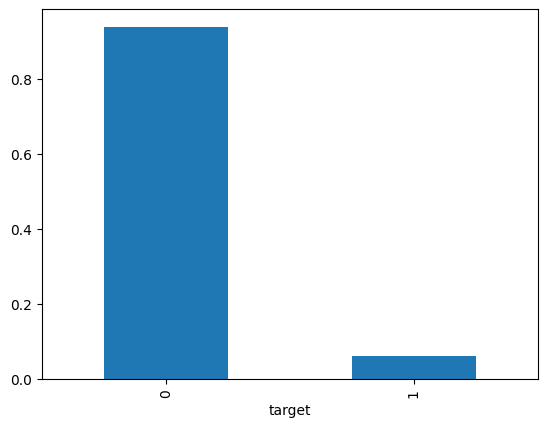

In [101]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [102]:
test_df = pd.read_csv(test_fname)

In [103]:
test_df


,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [104]:
sub_df = pd.read_csv(sample_fname)

In [105]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [106]:
sub_df.prediction.value_counts()

,count
prediction,
0,375806


In [107]:
SAMPLE_SIZE = 100_000

In [108]:
sample_df = raw_df.sample(SAMPLE_SIZE,random_state=42)

In [109]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


#PART2:
#### Text Preprocessing Techniques

Outline:

1. Understand the bag of words model
2. Tokenization
3. Stop word removal
4. Stemming

### Bag of Words Intuition

1. Create a list of all the words across all the text documents
2. You convert each document into vector counts of each word


Limitations:
1. There may be too many words in the dataset
2. Some words may occur too frequently
3. Some words may occur very rarely or only once
4. A single word may have many forms (go, gone, going or bird vs. birds)

 ##TOKENISATION: splitting a doc into words and seperators

In [110]:
from nltk.tokenize import sent_tokenize, word_tokenize


In [111]:
q0 = sincere_df.question_text.values[1]

In [112]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [113]:
tokenized_q0 = word_tokenize(q0)
tokenized_q0

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [114]:
q1= insincere_df.question_text.values[1]

In [115]:
q1

'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?'

In [116]:
tokenized_q1 = word_tokenize(q1)
tokenized_q1
#

['Which',
 'babies',
 'are',
 'more',
 'sweeter',
 'to',
 'their',
 'parents',
 '?',
 'Dark',
 'skin',
 'babies',
 'or',
 'light',
 'skin',
 'babies',
 '?']

#Stop Word Rmoval

In [117]:
from nltk.corpus import stopwords

In [118]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [119]:
english_stopwords = stopwords.words('english')

In [120]:
", ".join(english_stopwords)

"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

In [121]:
def remove_stopwords(tokenized_question):
  return [word for word in tokenized_question if word not in english_stopwords]

In [122]:
q0_stp = remove_stopwords(tokenized_q0)

In [123]:
q0_stp

['Do',
 'adopted',
 'dog',
 ',',
 'would',
 'encourage',
 'people',
 'adopt',
 'shop',
 '?']

##Stemming
go going goes

In [124]:
from nltk.stem.snowball import SnowballStemmer

In [125]:
stemmer = SnowballStemmer('english')

In [126]:
stemmer.stem('go')

'go'

In [127]:
stemmer.stem('going')

'go'

In [128]:
q0_stm = [stemmer.stem(word) for word in q0_stp]

In [129]:
q0_stm

['do', 'adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

#Lemmatisation
love , loving loved->love

#Implementataion of bag of words model
Outline:


*   Create a vocabulary using Count Vectorizer
*   Transform text to vectors using Count Vectorizer
*   Configure text preprocessing in Count Vectorizer










In [130]:
small_df = sample_df[:5]

In [131]:
small_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


##Create a vocabulary
We use count tokenization method in which we convert a collection of text documents to a matrix of token counts

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

In [133]:
small_vec = CountVectorizer()

In [134]:
small_vec.fit(small_df.question_text)

CountVectorizer()

In [135]:
small_vec.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

#Transfor documents into vectors

In [136]:
vectors = small_vec.transform(small_df.question_text)

In [137]:
vectors

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 56 stored elements and shape (5, 51)>

In [138]:
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]])

In [139]:
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [140]:
tokenize('What is the really (dealing) here?')

['what', 'is', 'the', 'realli', '(', 'deal', ')', 'here', '?']

In [141]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=1000)

In [142]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 31 s, sys: 194 ms, total: 31.2 s
Wall time: 40.4 s


CountVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7bc330db3740>)

In [143]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [144]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 27.9 s, sys: 177 ms, total: 28.1 s
Wall time: 28.3 s


In [145]:
inputs.shape

(100000, 1000)

In [146]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [147]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target,
                                                                        test_size=0.3, random_state=42)
test_inputs = vectorizer.transform(test_df.question_text)

model = LogisticRegression(max_iter=1000, solver='sag')


model.fit(train_inputs, train_targets)
train_preds = model.predict(train_inputs)

f1score_train = f1_score(train_targets, train_preds)
f1score_test = f1_score(val_targets, model.predict(val_inputs))

In [149]:
f1score_train

0.44586394123283296

In [149]:
f1score_test